<a href="https://colab.research.google.com/github/simbol105/Machine-learing-assignment/blob/main/08_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [34]:
np.random.seed(1)

# Load the iris dataset
iris = datasets.load_iris()
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

## 2.1. Implement the missing code parts

In [35]:
def bootstrap(
        x: np.array,
        y: np.array,
        target_size: int
    ) -> tuple:
    """
    Implement bootsrapping without using sklearn!

    Args:
        x (ndarray):
            The data in shape NxM
        y (ndarray):
            The target in shape N
        target_size (int):
            The size of the sample to return

    Returns:
        tuple(ndarray, ndarray):
            The bootstrapped sample where the data is at the first
            postion and the target at the second.
    """
    assert x.shape[0] == len(y)

    # TODO: Implement Bootsrapping
    x_boot = np.zeros((target_size, x.shape[1]))
    y_boot = np.zeros(target_size)
    for i in range(target_size):
        index = np.random.randint(0, x.shape[0])
        x_boot[i] = x[index]
        y_boot[i] = y[index]

    return x_boot, y_boot

    #raise NotImplementedError

In [36]:
class RandomForestClassifier():
    """
    A random forest classifier.
    """

    def __init__(
            self,
            num_trees: int = 100,
            bootstrapping_size: int = 50,
            feature_subset: int = 3
        ):
        """
        Initializes the RandomForestClassifier.

        Args:
            num_trees (int):
                Number of weak learner trees.
            bootstrapping_size (int):
                The size of the bootstrapped samples.
            feature_subset (int):
                The number of features to use for the splitting
                criteria.
        """
        # TODO: Implement initialization of the RandomForrestClassifier
        self.num_trees = num_trees
        self.bootstrapping_size = bootstrapping_size
        self.feature_subset = feature_subset
        self.trees = []

        #raise NotImplementedError

    def fit(
            self,
            x: np.array,
            y: np.array
        ):
        """
        Fitting the random forest to the data given.

        Args:
            x (ndarray):
                The data in shape NxM.
            y (ndarray):
                The target in shape N.
        """
        assert x.ndim == 2 and y.ndim == 1, "Wrong dimensions for X!"
        assert x.shape[0] == len(y), "Size of X and y does not match!"

        # TODO: Implement the algorithm to learn a random forrest.
        #       you may use sklearn.tree.DecisionThreeClassifier as the
        #       implementation for the weak learner
        for i in range(self.num_trees):
            x_boot, y_boot = bootstrap(x, y, self.bootstrapping_size)
            model = DecisionTreeClassifier()
            model.fit(x_boot, y_boot)
            self.trees.append(model)

        #raise NotImplementedError

    def predict(self, x: np.array) -> np.array:
        """
        Predict the target class for the data X using majority voting.

        Args:
            x (ndarray):
                The data in shape NxM.

        Returns:
            (ndarray):
                The predictions in shape N
        """

        assert x.ndim == 2

        # TODO: Implement the prediction of the random forest.
        for i in range(self.num_trees):
            if i == 0:
                y_pred = self.trees[i].predict(x)
            else:
                y_pred = np.vstack((y_pred, self.trees[i].predict(x)))

        y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=y_pred.astype('int'))
        return y_pred
        #raise NotImplementedError

## 2.2. What is the accuracy you get with the default hyperparameters?

In [37]:
# TODO: Create a random forest, fit it to the train data, generate
#       predictions on the test inputs, and evaluate the accuracy of
#       the model on the test data.
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9736842105263158


### 2.3. Set the value of `bootstrapping_size` to a lower number and then to a higher number than the default.<br/>How doest the accuracy change?<br/>Why is this happening?

In [38]:
# TODO: Calculate the accuracy of models wit bootstrapping sizes
#       ranging from 10 to 110.
bootstrapping_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
accuracies = []
for size in bootstrapping_sizes:
    model = RandomForestClassifier(bootstrapping_size=size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Bootstrapping size: {size}, Accuracy: {accuracy}")


Bootstrapping size: 10, Accuracy: 0.9736842105263158
Bootstrapping size: 20, Accuracy: 0.9736842105263158
Bootstrapping size: 30, Accuracy: 0.9736842105263158
Bootstrapping size: 40, Accuracy: 0.9736842105263158
Bootstrapping size: 50, Accuracy: 0.9736842105263158
Bootstrapping size: 60, Accuracy: 0.9736842105263158
Bootstrapping size: 70, Accuracy: 0.9736842105263158
Bootstrapping size: 80, Accuracy: 0.9736842105263158
Bootstrapping size: 90, Accuracy: 0.9736842105263158
Bootstrapping size: 100, Accuracy: 0.9736842105263158
Bootstrapping size: 110, Accuracy: 0.9736842105263158


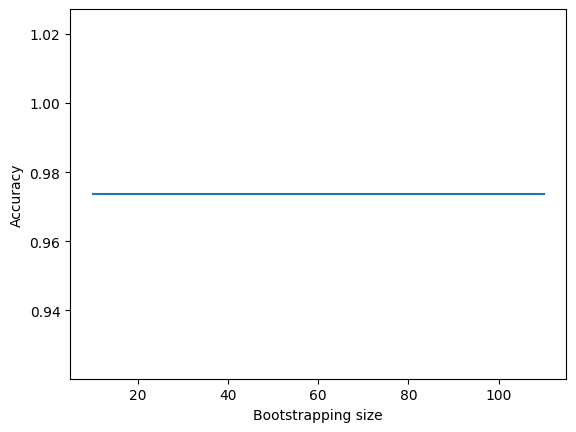

In [39]:
# TODO: Plot the accuracies for the different bootsrapping sizes
plt.plot(bootstrapping_sizes, accuracies)
plt.xlabel("Bootstrapping size")
plt.ylabel("Accuracy")
plt.show()
